#### Data Import 

In [1]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

#
# Eunice Kim
#### Entity ID : ddd9bb4b-8965-4046-8b20-9b2f273fe0d9

In [2]:
entity_id = 'ddd9bb4b-8965-4046-8b20-9b2f273fe0d9'

## Basic Informations 

In [3]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
81704,ddd9bb4b-8965-4046-8b20-9b2f273fe0d9,Eunice Kim,NaN,True,NaN,NaN,38.0


In [4]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
81704,3,12,5,2,2,3


## 1 - Performances 

In [5]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs.head(10)

,date,venue,country,city,title,key,continent
12196,2008-02-27 19:00:00.000000,Zankel Hall,United States of America,NaN,From the Top,NaN,North America
15505,2008-02-27 19:00:00.000000,Zankel Hall,United States of America,NaN,From the Top,NaN,North America
72602,2014-03-20 19:30:00.000000,Zankel Hall,United States of America,NaN,Curtis 20/21 Ensemble,NaN,North America


## 2 - Pieces 

In [6]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
5496,Johann Sebastian Bach (1685—1750),"The Art of the Fugue, BWV 1080: Contrapunctus ...",16
6724,Pablo de Sarasate (1844—1908),"Zigeunerweisen, Op. 20 (1878)",16
11698,Kent Kennan (1913—2003),Sonata for Trumpet and Piano: With strength an...,16
11699,Felix Mendelssohn (1809—1847),"String Quartet No. 3 in D Major, Op. 44, No. 1...",16
11700,Paul Smadbeck (1955—),Rhythm Song (1984),16
11701,Joseph Haydn (1732—1809),"Piano Trio in G Major, H.XV:25, ""Gypsy"": 3. Fi...",16
14540,Krzysztof Penderecki (1933—),Sinfonietta (1990-1991),16
63875,Kent Kennan (1913—2003),Sonata for Trumpet and Piano: 1. With strength...,16
128659,Krzysztof Penderecki (1933—),Duo concertante (2011),16
128660,Krzysztof Penderecki (1933—),Suite for Solo Cello (1994-2013),16


## 3 - Media mentions 

In [7]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text
259163,"St Paul signs Eunice Kim, 25\t\t\t\n\t\t\n\t\t...",https://slippedisc.com/2016/10/st-paul-signs-e...,"St Paul signs Eunice Kim, 25"
259164,"Death of New York pianist and agency founder, ...",https://slippedisc.com/2020/03/death-of-new-yo...,"Death of New York pianist and agency founder, 92"
259165,Inside the Midwest’s conductorless orchestra\t...,https://slippedisc.com/2018/11/inside-the-midw...,Inside the Midwest’s conductorless orchestra
301555,Young Soloists reinvent Beethoven\t\t\t\n\t\t\...,https://slippedisc.com/2021/01/young-soloists-...,Young Soloists reinvent Beethoven
437687,\nNewsViolinist Eunice Kim joins the Saint Pau...,NaN,NaN


In [8]:
# One example of media mentions
if len(df_medias) > 0 : 
    print(df_medias.iloc[0].comparable_text)

St Paul signs Eunice Kim, 25			
		
				
					
			norman lebrecht		
				
			October 6, 2016		
				
				
			The St Paul Chamber Orchestra has filled 22 out of 28 permanent posts with the recruitment of Curtis grad Eunice Kim, a lifer who has
		
					
				Read More »


## 4 - Wikipedia Page Views 

In [9]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date


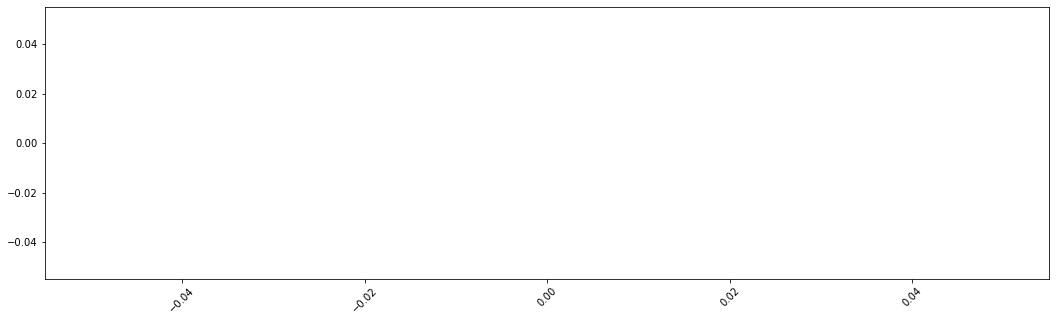

In [10]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [11]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name
57,Violinist
68,Cellist


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [12]:
entity_info.alter_names.to_list()

[['kim eunice', 'eunice kim']]

## 7 - Biographies 

In [13]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']]

,detail,year,source
62028,"A young artist with a unique voice, violinist ...",2018,20
62035,\n A young artist with a unique voi...,2018,20
62040,"A young artist with a unique voice, violinist ...",2018,17


In [14]:
# One bography example 
if len(df_bios) > 0 : 
    print(df_bios.iloc[0].detail)

A young artist with a unique voice, violinist Eunice Kim has been proclaimed “just superb” by The New York Times and “a born performer” by Epoch Times. A native of the San Francisco Bay Area, the Astral Award-winning violinist has been featured soloist with The Philadelphia Orchestra, Louisville Symphony, St. Paul Chamber Orchestra, the Seongnam Philharmonic, Bakersfield Symphony, and the Albany Symphony Orchestra, with which she has recorded George Tsontakis’s Unforgettable for 2017 release on Naxos Records. As a guest artist for Curtis on Tour, she has performed in Taiwan, Hong Kong, South Korea, and Germany with violist Roberto Díaz, and appeared at both the Library of Congress and the United Nations for Secretary General Ban Ki-moon.

An avid chamber musician, Ms. Kim has appeared at Music at Angel Fire, Music@Menlo, Ravinia’s Steans Institute of Music, Marlboro Music School and Festival, and as a guest artist at the Tippet Rise Art Center. She has collaborated with such prominent 